# Análise de Dados e Inferência Estatística com Python

### Trabalho I - Tratamento de dados com Estatística

**Professor:** Paulo Cotta

**Entrega:** 14/11/2019

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston.

Neste projeto, você irá avaliar um conjunto de dados coletado dos imóveis dos subúrbios de Boston, Massachusetts. O principal objetivo deste trabalho é realizar a análise e começar a trabalhar com funções e métodos que serão utilizados no dia a dia de vocês como Engenheiros de Dados e/ou Engenheiros de Machine Learning.


**Vale lembrar que o trabalho terá situações que serão feitas em sala de aula (então nem todo o conteúdo foi abordado ainda), para qualquer dúvida pode procurar o professor.**

In [2]:
# Verificação se o sklearn está instalado na sua máquina
# Simple and efficient tools for data mining and data analysis
# Accessible to everybody, and reusable in various contexts
# Built on NumPy, SciPy, and matplotlib
# Open source, commercially usable - BSD license
import sklearn
print("A versão do scikit-learn é ", sklearn.__version__)

A versão do scikit-learn é  0.20.3


O sklearn é um framework que já possui alguns algoritmos de Machine Learning (ML) prontos. Eu recomento que utilizem sempre a ultima versão do framework.

Documentação: [link](https://scikit-learn.org/stable/)

Mediante ao cenário seguinte:

Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Fica mais tranquilo efetuar o trabalho conhecendo um pouco sobre o conjunto de dados (dataset).

In [4]:
# Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
# Dropando a coluna com maior indice de valores ausentes
features = data.drop('MEDV', axis = 1)

data.info()

# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB
O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


In [5]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
data.shape # 489 registro e 4 colunas
#data.dtypes # tipos de dados das colunas

(489, 4)

### Explorando os dados

Você aluno deve efetuar uma investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

In [7]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


In [8]:
# Trouxe os mesmo resultados apresentados e inclusive os Quartis
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [ ]:
### Questão 1

Estamos utilizando apenas as seguintes variáveis para analisar:
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.


**A) Qual das variáveis pode interferir com o valor da variável `'MEDV'` e elevar o seu aumento?**
Resposta: RM, pois:
   RM Correlação (Positiva).....:  [[1.         0.69720922] [0.69720922 1.        ]]
   PTRATIO Correlação (Negativa):  [[ 1.        -0.5190335] [-0.5190335  1.       ]]
   LSTAT Correlação (Negativa)..:  [[ 1.         -0.76067006] [-0.76067006  1.        ]]    

**B) A mesma variável da questão A `'MEDV'`, qual variável pode diminuir o seu valor?**
Resposta:   LSTAT, pois tem a maior correlação negativa
    
**OBS:** Lembra-se que podem utilizar as variáveis que ditam a MODA em formato estatítisco.

Correlação:  [[1.         0.69720922]
 [0.69720922 1.        ]]
b1:  -663283.910582522
b0:  [179098.59189784]
𝑓(𝐱) =  [179098.59189784]  +  -663283.910582522 x
Previsão 2 (12 quartos):  [1485899.19219157]


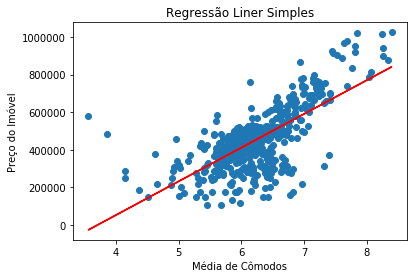

In [21]:
#Regressão Linear para previsão de números

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

#RM LSTAT PTRATIO MEDV
X = data.iloc[:,0].values # seleciona a primeira coluna (0) do data set
#                           atributos previsores; Variáveis explanatória. Qdo há apenas uma variável explanatória,
#                           temos a Regressão Linear Simples
Y = data.iloc[:,3].values # seleciona a quarta coluna
#                           É o objetivo do que quero fazer a previsão

correlacao = np.corrcoef(X,Y)

print("Correlação: ", correlacao)

X = X.reshape(-1,1) # transforma em uma única coluna (..,1) ou duas colunas (...,2). (2, -1). duas linhas e n colunas

#print("X", X)

# A Regressão Linear procurará por uma relação entre variáveis que neste caso são as colunas RM LSTAT PTRATIO MEDV da tabela
# housing.csv. Cada coluna da tabela representa uma observação sobre a casa. A presunção é que RM, LSTAT e PTRATIO são
# características independentes e que MEDV depende delas. Estas características independentes são chamadas de variáveis
# independentes, inputs ou predictors. As características dependentes são chamadas de variáveis dependentes, outputs ou 
# respostas.
# It is a common practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables,
# they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.
regressor = LinearRegression()
regressor.fit(X,Y)

#b0
print("b1: ",regressor.intercept_)

#b1
print("b0: ",regressor.coef_)
# the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ
print('𝑓(𝐱) = ',regressor.coef_,  ' + ', regressor.intercept_ , 'x' )


plt.scatter(X,Y)
plt.title("Regressão Liner Simples")
plt.plot(X, regressor.predict(X), color= 'red')
plt.xlabel("Média de Cômodos")
plt.ylabel("Preço do Imóvel")

#previsao1 = regressor.predict(12)
#print("Previsão com 6 quartos", previsao1)

previsao2 = regressor.intercept_ + regressor.coef_ * 12

print("Previsão 2 (12 quartos): ", previsao2)

#from yellowbrick.regressor import ResidualsPlot
#visualizador = ResidualsPlot(regressor)
#visualizador.fit(X,Y)
#visualizador.poof()


### Modelo Métrica de Desempenho

Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas.

In [23]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2

Dado a função acima do modelo de performance por desempenho, usando o coeficiente R<sup>2</sup> devemos utilizar algumas métricas.

Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [16]:
# Insira o código usando a função performance_metric para calcular
from sklearn.metrics import r2_score

y_true    = [3.0, -0.5, 2.0, 7.0, 4.2]
y_predict = [2.5,  0.0, 2.1, 7.8, 5.3]

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

print("Score: ",performance_metric(y_true, y_predict))

Score:  0.9228556485355649


**Justifique o valor de saída da função R<sup>2</sup>:**

### Em formato de conhecimento - Misturar e Separar os Dados

Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Neste caso será mostrado a separação do dataset em 80% treinamento e 20% em teste, o que geralmente fazemos em um modelo de Machine Learning e ou Deep Learning. 


Para título de curiosidade [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html).

In [18]:
# TODO: Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data['MEDV'])
# test_size com 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3

Após executar todo o trabalho, apresente uma revisão sistemática do uso de média, mediana e R<sup>2</sup>. Cada item deve conter, no mínimo, 2 (dois) parágrafos de explicação.
Importante: Lembre-se de adicionar as referências bibliográficas utilizadas.

A média ou média aritimética pode ser definida como a soma das observações divididas pelo número delas. Assim, a média aritmética de 3, 4, 7, 8 e 8 é (3 + 4 + 7 + 8 + 8)/5 = 6. (Morettin, 2010, pág.35).

A mediana é a realização que ocupa a posição central da série de observações, quando estão ordenadas em ordem crescente. Assim, se as cinco observações de uma variável forem 3, 4, 7, 8 e 8, a mediana é o valor 7, correspondendo à terceira observação. Quando o número de observações for par, usa-se como mediana a média aritmética das duas observações centrais. Acrescentando-se o valor 9 à série acima (3,4,7,8,8,9), a mediana será (7 + 8)/2 = 7,5.(Morettin, 2010, pág.35)

O símbolo R2 é comumente utilizado em análise de variância e regressão. É um valor entre 0 e 1 que indica o grau de assertividade do modelo. Como exemplificado por Morettin, o valor de R2 = 96,3%, que nos diz que o modelo ajustado explica a maior parte da variabilidade dos dados. Já segundo apresentado em Kahn Academy (2), 0 coeficiente de determinação é um ajuste no modelo de correlação linear que varia de 0 a 1 e é expresso em porcentagem. Trata-se do valor do coeficiente de correlação ao quadrado, e por isso, sempre será um valor positivo. Este resultado descreve o quão preciso a reta descreve os pontos apresentados.

(1) - Morettin, Pedro Alberto, Estatística Básica/Pedro A. Morettin, Wilton O. Bussab. – 6. ed. – São Paulo : Saraiva, 2010 página 35
(2) - https://pt.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/r-squared-or-coefficient-of-determination